In [1]:
from memory_profiler import profile
from memory_profiler import memory_usage

In [2]:
%load_ext memory_profiler

In [3]:
# loading packages

In [4]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
# read data

In [6]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


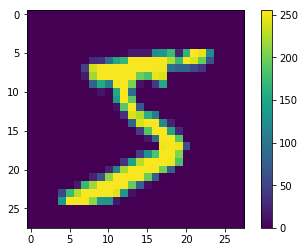

In [7]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
x_train = x_train / 255.0

x_test = x_test / 255.0

In [9]:
class_names = [0,1,2,3,4,5,6,7,8,9]

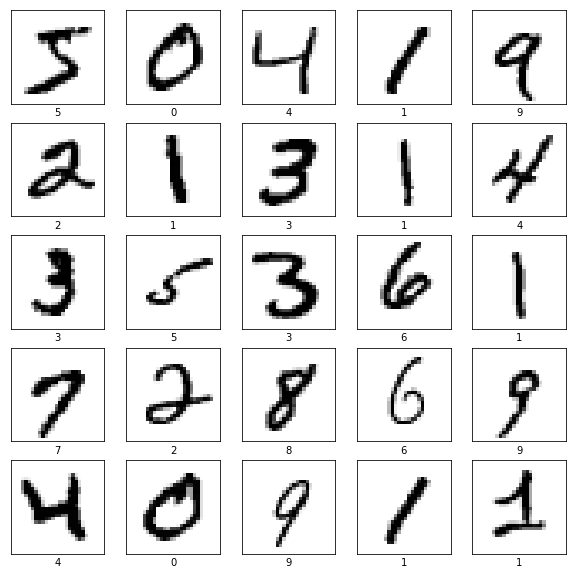

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
%prun %timeit %memit
model.fit(x_train, y_train, epochs=5)

peak memory: 608.57 MiB, increment: 0.04 MiB
peak memory: 608.57 MiB, increment: 0.00 MiB
peak memory: 608.59 MiB, increment: 0.02 MiB
peak memory: 608.59 MiB, increment: 0.00 MiB
peak memory: 608.59 MiB, increment: 0.00 MiB
peak memory: 608.59 MiB, increment: 0.00 MiB
peak memory: 608.53 MiB, increment: -0.06 MiB
peak memory: 608.53 MiB, increment: 0.00 MiB
7.13 s ± 217 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
 Epoch 1/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.2534 - acc: 0.9271
Epoch 2/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.1125 - acc: 0.9671
Epoch 3/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.0791 - acc: 0.9761
Epoch 4/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.0584 - acc: 0.9825
Epoch 5/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.0451 - acc: 0.9862


In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 54us/step
Test accuracy: 0.976


In [15]:
%prun %timeit %memit
predictions = model.predict(x_test)

peak memory: 623.09 MiB, increment: 0.00 MiB
peak memory: 623.09 MiB, increment: 0.00 MiB
peak memory: 623.09 MiB, increment: 0.00 MiB
peak memory: 623.09 MiB, increment: 0.00 MiB
peak memory: 623.09 MiB, increment: 0.00 MiB
peak memory: 623.09 MiB, increment: 0.00 MiB
peak memory: 623.09 MiB, increment: 0.00 MiB
peak memory: 623.09 MiB, increment: 0.00 MiB
7.25 s ± 502 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
 

In [16]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
#correct predictions are blue, incorrect are red

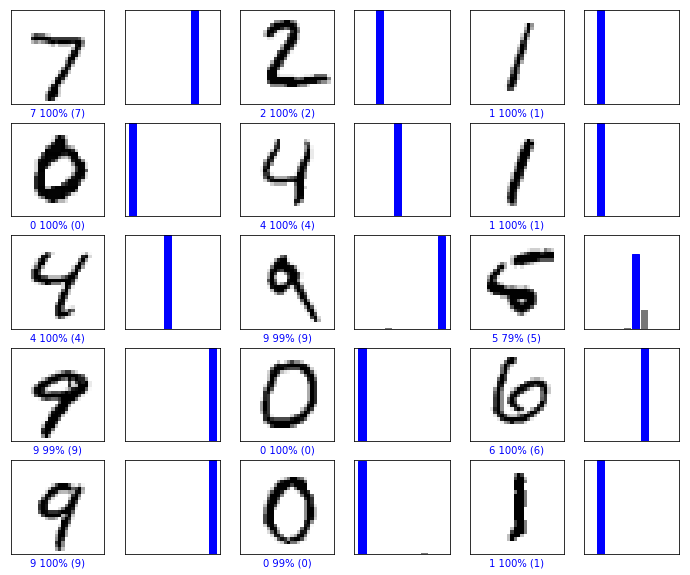

In [17]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)